In [145]:
from os import listdir
from os.path import isfile, join
from statistics import fmean

import pandas as pd
from matplotlib import cm
from matplotlib.colors import Normalize

pd.options.mode.chained_assignment = None  # default='warn'
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import tikzplotlib

In [129]:
file_list = [f for f in listdir("distribution_output") if isfile(join("distribution_output", f))]
dfs_train = {}
dfs_val = {}
for i in range(len(file_list)):
    fname = "distribution_output/" + file_list[i]
    df_temp = pd.read_csv(fname)
    df_temp.set_index(['client'], inplace=True)
    if "val" in file_list[i]:
        dfs_val[file_list[i].replace(".csv", "").replace("_validation", "")] = df_temp
    else:
        dfs_train[file_list[i].replace(".csv", "").replace("_train", "")] = df_temp

In [103]:
nrows = len(dfs_val.keys())
fig, axs = plt.subplots(ncols=2, nrows=nrows, figsize=(25, 50))
fig.subplots_adjust(wspace=0.01)
for i, key in enumerate(dfs_val.keys()):
    sns.heatmap(dfs_val[key], cmap="rocket", ax=axs[i][0], cbar=False, vmin=0)
    fig.colorbar(axs[i][0].collections[0], ax=axs[i][0],location="left", use_gridspec=False, pad=0.2)
    sns.heatmap(dfs_train[key], cmap="rocket", ax=axs[i][1], cbar=False, vmin=0)
    fig.colorbar(axs[i][1].collections[0], ax=axs[i][1],location="right", use_gridspec=False, pad=0.2)
    axs[i][1].yaxis.tick_right()
    axs[i][1].tick_params(rotation=0)
    axs[i][0].set_title(key + " validation")
    axs[i][1].set_title(key + " training")
plt.show()

ValueError: Number of rows must be a positive integer, not 0

/tmp/ipykernel_85383/2364049803.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('viridis')


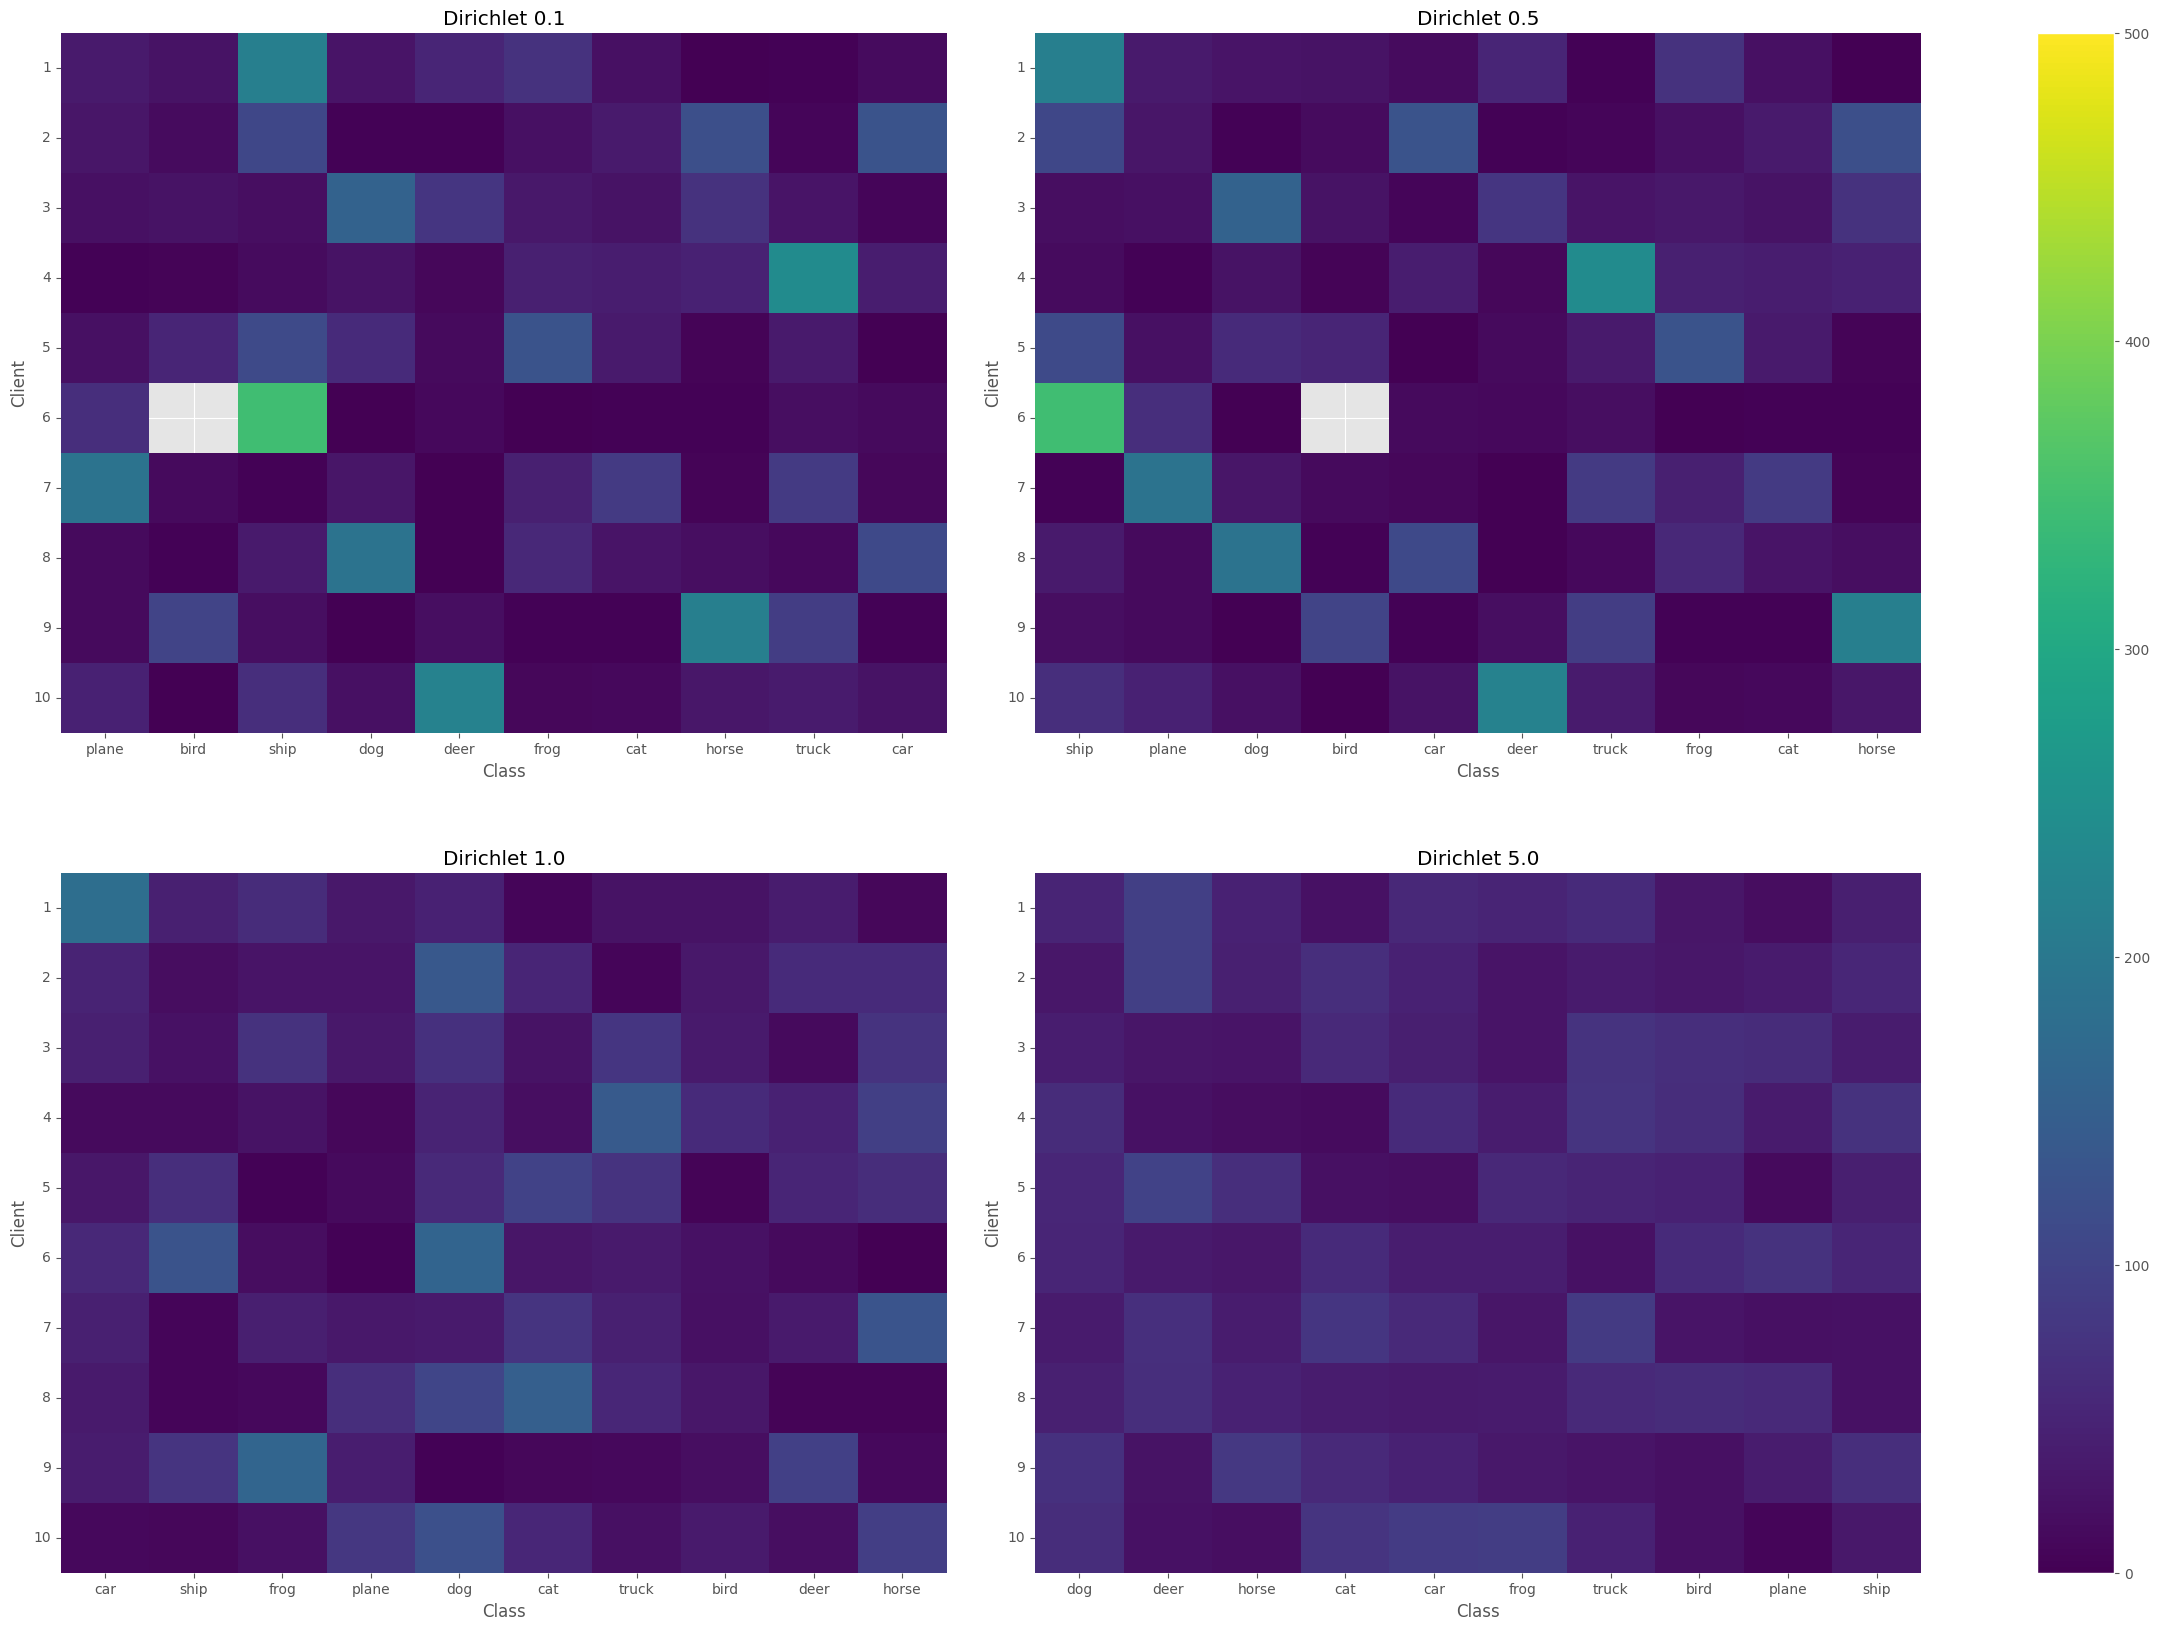

In [148]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(30, 20))
fig.subplots_adjust(wspace=0.1, hspace=0.2)
cmap=mpl.colormaps['viridis']
normalizer=Normalize(0,500)
im=cm.ScalarMappable(norm=normalizer)
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("ggplot")
sns.heatmap(dfs_train['data_label_distribution_dirichlet_01'], cmap=cmap,norm=normalizer, ax=axs[0][0], cbar=False, vmin=0)

sns.heatmap(dfs_train['data_label_distribution_dirichlet_05'], cmap=cmap,norm=normalizer, ax=axs[0][1], cbar=False, vmin=0)
sns.heatmap(dfs_train['data_label_distribution_dirichlet_10'], cmap=cmap,norm=normalizer, ax=axs[1][0], cbar=False, vmin=0)

sns.heatmap(dfs_train['data_label_distribution_dirichlet_50'], cmap=cmap,norm=normalizer, ax=axs[1][1], cbar=False, vmin=0)

axs[0][0].set_title("Dirichlet 0.1")
axs[0][1].set_title("Dirichlet 0.5")
axs[1][0].set_title("Dirichlet 1.0")
axs[1][1].set_title("Dirichlet 5.0")
for x in axs:
    for y in x:
        y.set_xlabel("Class")
        y.set_ylabel("Client")
        # Turn off tick labels
        y.set_yticklabels([1,2,3,4,5,6,7,8,9,10])
        #y.set_xticklabels([1,2,3,4,5,6,7,8,9,10])
fig.colorbar(im, ax=axs.ravel().tolist())
plt.show()
#tikzplotlib.save("data_label_distributions_dirichlet.tex", extra_groupstyle_parameters={f'horizontal sep=1.5cm, vertical sep=2cm'})

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(7, 7))
fig.subplots_adjust(wspace=1, hspace=1)
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("ggplot")
sns.histplot(dfs_train['data_label_distribution_dirichlet_01'].sum(axis=1), ax=axs[0][0], binwidth=500, binrange=(0, 5000))
sns.histplot(dfs_train['data_quantity_distribution_dirichlet_01'].sum(axis=1), ax=axs[0][1], binwidth=500, binrange=(0, 5000))
sns.histplot(dfs_train['data_quantity_distribution_dirichlet_10'].sum(axis=1), ax=axs[1][0], binwidth=500, binrange=(0, 5000))
sns.histplot(dfs_train['data_quantity_distribution_uniform'].sum(axis=1), ax=axs[1][1], binwidth=100, binrange=(0, 5000))
axs[0][0].set_title("Dirichlet 0.5")
axs[0][1].set_title("Dirichlet 0.1")
axs[1][0].set_title("Dirichlet 1.0")
axs[1][1].set_title("Uniform")
for x in axs:
    for y in x:
        y.set_xlabel("Number of samples")
        y.set_ylabel("Number of clients")
        y.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
        y.set_xlim(0,5000)
        y.set_ylim(0,110)
        y.hlines(100, colors="black", xmin=0, xmax=5000, linestyles='dashed')
#tikzplotlib.save("data_quantity_distributions.tex", extra_groupstyle_parameters={f'horizontal sep=1.5cm, vertical sep=2cm'})
plt.show()